In [99]:
#set up packages and read data
import pandas as pd
import numpy as np
import datetime as datetime
from dfply import *


In [100]:
rate = pd.read_csv('rate.csv')
#print the first 5 rows
#rate.head()
sales = pd.read_csv('vgsales.csv')
#print the first 5 rows
#sales.head()

In [101]:
rate.head()

,Game.1,Publisher,VGChartz Score,Critic Score,User Score,Total Shipped,Release Date,Release_year,Release,Month_Since_Released,Day_Since_Released
0,Marvel's Spider-Man Read the review,Sony Interactive Entertainment,8.0,9.1,NaN,20.00m,07th Sep 18,18.0,2018-09-07,816.0,816.0
1,Grand Theft Auto V,Rockstar Games,NaN,9.7,NaN,NaN,18th Nov 14,14.0,2014-11-18,2205.0,2205.0
2,Uncharted 4: A Thief's End,Sony Interactive Entertainment,NaN,9.2,NaN,16.25m,10th May 16,16.0,2016-05-10,1666.0,1666.0
3,Call of Duty: Black Ops 3,Activision,NaN,NaN,NaN,NaN,06th Nov 15,15.0,2015-11-06,1852.0,1852.0
4,Red Dead Redemption 2 Read the review,Rockstar Games,8.0,9.8,NaN,NaN,26th Oct 18,18.0,2018-10-26,767.0,767.0


In [102]:
sales.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [103]:
sales = sales.query('Platform == "PS4"')
sales = sales.drop(columns=['Publisher'])
sales.head()

,Rank,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,5.77,5.81,0.35,2.31,14.24
44,45,Grand Theft Auto V,PS4,2014.0,Action,3.80,5.81,0.36,2.02,11.98
77,78,FIFA 16,PS4,2015.0,Sports,1.11,6.06,0.06,1.26,8.49
92,93,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.93,3.29,0.22,1.23,7.67
93,94,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.80,3.30,0.14,1.37,7.60


In [104]:
rate = rate.rename(columns={"Game.1": "Name"})
rate = rate.drop(columns=['Release Date','Release','Month_Since_Released',"Release_year"])
rate.head()

,Name,Publisher,VGChartz Score,Critic Score,User Score,Total Shipped,Day_Since_Released
0,Marvel's Spider-Man Read the review,Sony Interactive Entertainment,8.0,9.1,NaN,20.00m,816.0
1,Grand Theft Auto V,Rockstar Games,NaN,9.7,NaN,NaN,2205.0
2,Uncharted 4: A Thief's End,Sony Interactive Entertainment,NaN,9.2,NaN,16.25m,1666.0
3,Call of Duty: Black Ops 3,Activision,NaN,NaN,NaN,NaN,1852.0
4,Red Dead Redemption 2 Read the review,Rockstar Games,8.0,9.8,NaN,NaN,767.0


In [105]:
final = rate >> full_join(sales, by='Name')

In [106]:
final

,Name,Publisher,VGChartz Score,Critic Score,User Score,Total Shipped,Day_Since_Released,Rank,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Marvel's Spider-Man Read the review,Sony Interactive Entertainment,8.0,9.1,NaN,20.00m,816.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Grand Theft Auto V,Rockstar Games,NaN,9.7,NaN,NaN,2205.0,45.0,PS4,2014.0,Action,3.80,5.81,0.36,2.02,11.98
2,Uncharted 4: A Thief's End,Sony Interactive Entertainment,NaN,9.2,NaN,16.25m,1666.0,272.0,PS4,2016.0,Shooter,1.30,2.07,0.18,0.65,4.20
3,Call of Duty: Black Ops 3,Activision,NaN,NaN,NaN,NaN,1852.0,34.0,PS4,2015.0,Shooter,5.77,5.81,0.35,2.31,14.24
4,Red Dead Redemption 2 Read the review,Rockstar Games,8.0,9.8,NaN,NaN,767.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2282,Tokyo Xanadu eX+,NaN,NaN,NaN,NaN,NaN,NaN,15039.0,PS4,2016.0,Role-Playing,0.00,0.00,0.02,0.00,0.02
2283,Black Rose Valkyrie,NaN,NaN,NaN,NaN,NaN,NaN,15478.0,PS4,2016.0,Role-Playing,0.00,0.00,0.02,0.00,0.02
2284,Resident Evil 5 HD,NaN,NaN,NaN,NaN,NaN,NaN,16098.0,PS4,2016.0,Action,0.01,0.00,0.00,0.00,0.01
2285,Republique,NaN,NaN,NaN,NaN,NaN,NaN,16178.0,PS4,2016.0,Action,0.00,0.01,0.01,0.00,0.01


## Clean Data

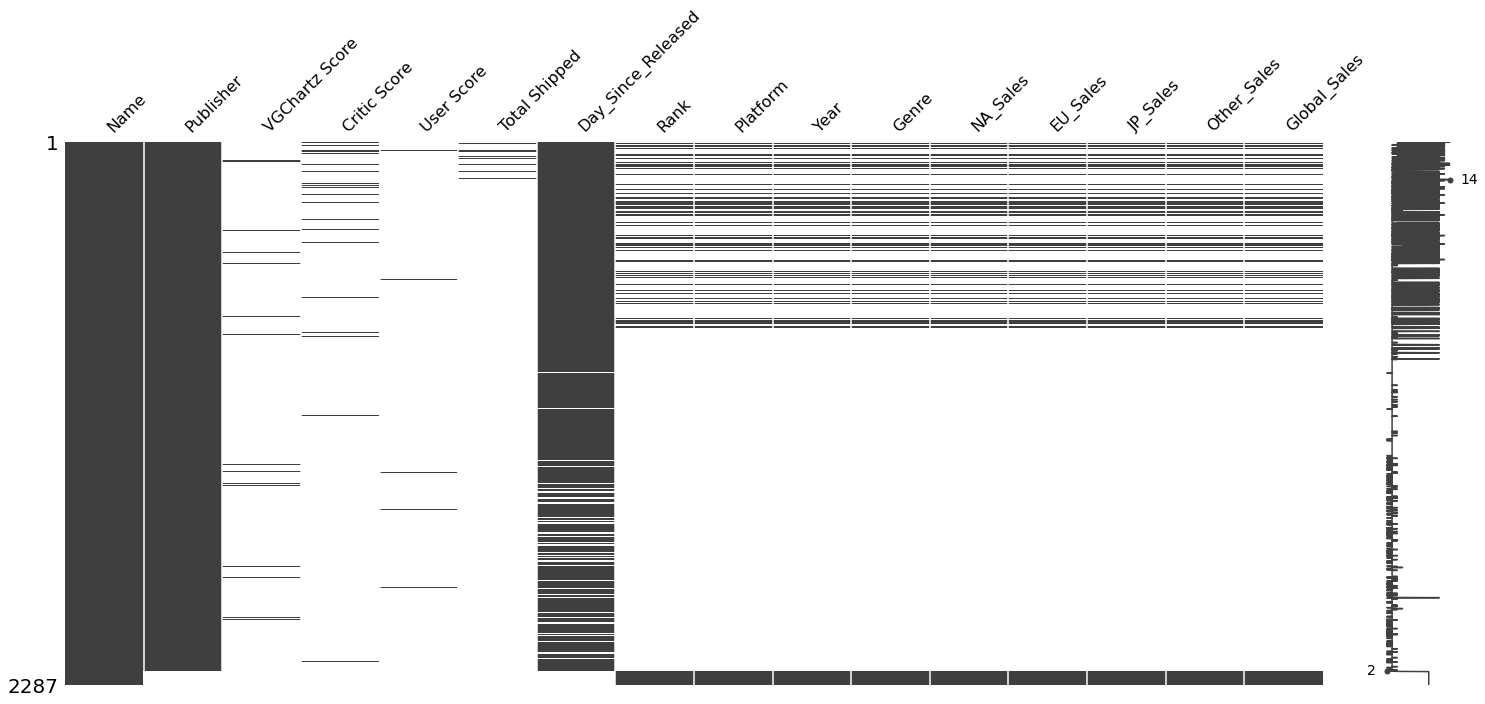

In [107]:
#import msno package
import missingno as msno
#visually assess missing values
msno.matrix(final)

In [108]:
#deal with na values

final.dropna(subset=['Global_Sales'])
#Publisher
final['Publisher'].fillna('Others', inplace=True)
#Scores
final.head()

,Name,Publisher,VGChartz Score,Critic Score,User Score,Total Shipped,Day_Since_Released,Rank,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Marvel's Spider-Man Read the review,Sony Interactive Entertainment,8.0,9.1,NaN,20.00m,816.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Grand Theft Auto V,Rockstar Games,NaN,9.7,NaN,NaN,2205.0,45.0,PS4,2014.0,Action,3.80,5.81,0.36,2.02,11.98
2,Uncharted 4: A Thief's End,Sony Interactive Entertainment,NaN,9.2,NaN,16.25m,1666.0,272.0,PS4,2016.0,Shooter,1.30,2.07,0.18,0.65,4.20
3,Call of Duty: Black Ops 3,Activision,NaN,NaN,NaN,NaN,1852.0,34.0,PS4,2015.0,Shooter,5.77,5.81,0.35,2.31,14.24
4,Red Dead Redemption 2 Read the review,Rockstar Games,8.0,9.8,NaN,NaN,767.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
#since the database was based on 2016, we need to drop observations later than 2016
#Drop those without global sales
final = final.dropna(subset=['Year'])

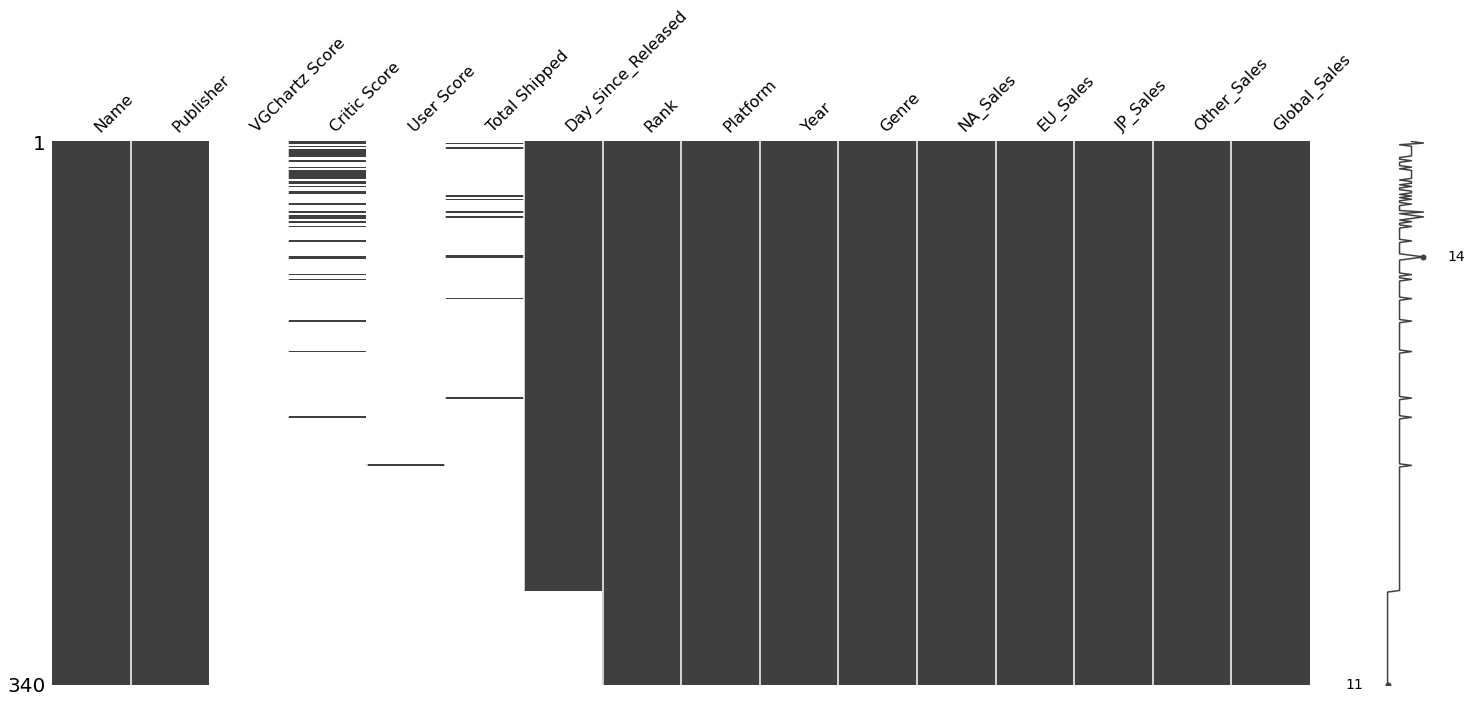

In [110]:
msno.matrix(final)

In [111]:
#fill na values
cri_avg = final['Critic Score'].mean()
final['Critic Score'].fillna(cri_avg, inplace=True)

/Users/ruyiyang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [112]:
final.drop(columns=["VGChartz Score","User Score"])

,Name,Publisher,Critic Score,Total Shipped,Day_Since_Released,Rank,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,Grand Theft Auto V,Rockstar Games,9.700000,NaN,2205.0,45.0,PS4,2014.0,Action,3.80,5.81,0.36,2.02,11.98
2,Uncharted 4: A Thief's End,Sony Interactive Entertainment,9.200000,16.25m,1666.0,272.0,PS4,2016.0,Shooter,1.30,2.07,0.18,0.65,4.20
3,Call of Duty: Black Ops 3,Activision,8.080556,NaN,1852.0,34.0,PS4,2015.0,Shooter,5.77,5.81,0.35,2.31,14.24
9,FIFA 17,Electronic Arts,8.900000,NaN,1526.0,222.0,PS4,2016.0,Sports,0.28,3.75,0.06,0.69,4.77
10,The Witcher 3: Wild Hunt,Warner Bros. Interactive Entertainment,8.080556,10.80m,2023.0,332.0,PS4,2015.0,Role-Playing,0.96,2.00,0.21,0.56,3.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2282,Tokyo Xanadu eX+,Others,8.080556,NaN,NaN,15039.0,PS4,2016.0,Role-Playing,0.00,0.00,0.02,0.00,0.02
2283,Black Rose Valkyrie,Others,8.080556,NaN,NaN,15478.0,PS4,2016.0,Role-Playing,0.00,0.00,0.02,0.00,0.02
2284,Resident Evil 5 HD,Others,8.080556,NaN,NaN,16098.0,PS4,2016.0,Action,0.01,0.00,0.00,0.00,0.01
2285,Republique,Others,8.080556,NaN,NaN,16178.0,PS4,2016.0,Action,0.00,0.01,0.01,0.00,0.01


In [117]:
final.dtypes

Name                   object
Publisher              object
VGChartz Score        float64
Critic Score          float64
User Score            float64
Total Shipped          object
Day_Since_Released    float64
Rank                  float64
Platform               object
Year                  float64
Genre                  object
NA_Sales              float64
EU_Sales              float64
JP_Sales              float64
Other_Sales           float64
Global_Sales          float64
dtype: object

## Overview Data

In [121]:
# Plotting libraries
from plotnine import *
import matplotlib.pyplot as plt

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn import tree # For plotting the decision tree rules

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline



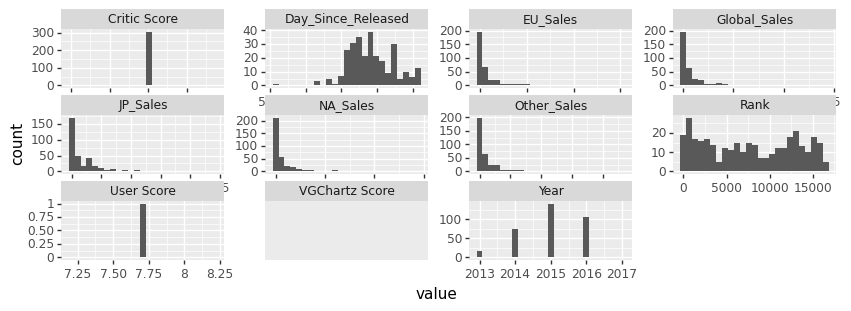

<ggplot: (310254544)>

In [122]:
# Plot the continuous Variables 
d = final.select_dtypes(include="float64").melt()
(
    ggplot(d,aes(x="value")) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(10,3),
          subplots_adjust={'wspace':0.25})
)

In [ ]:
#Change categorical value to numerical
for col in ['Publisher','Genre']:
    final[col] = final[col].astype('category')

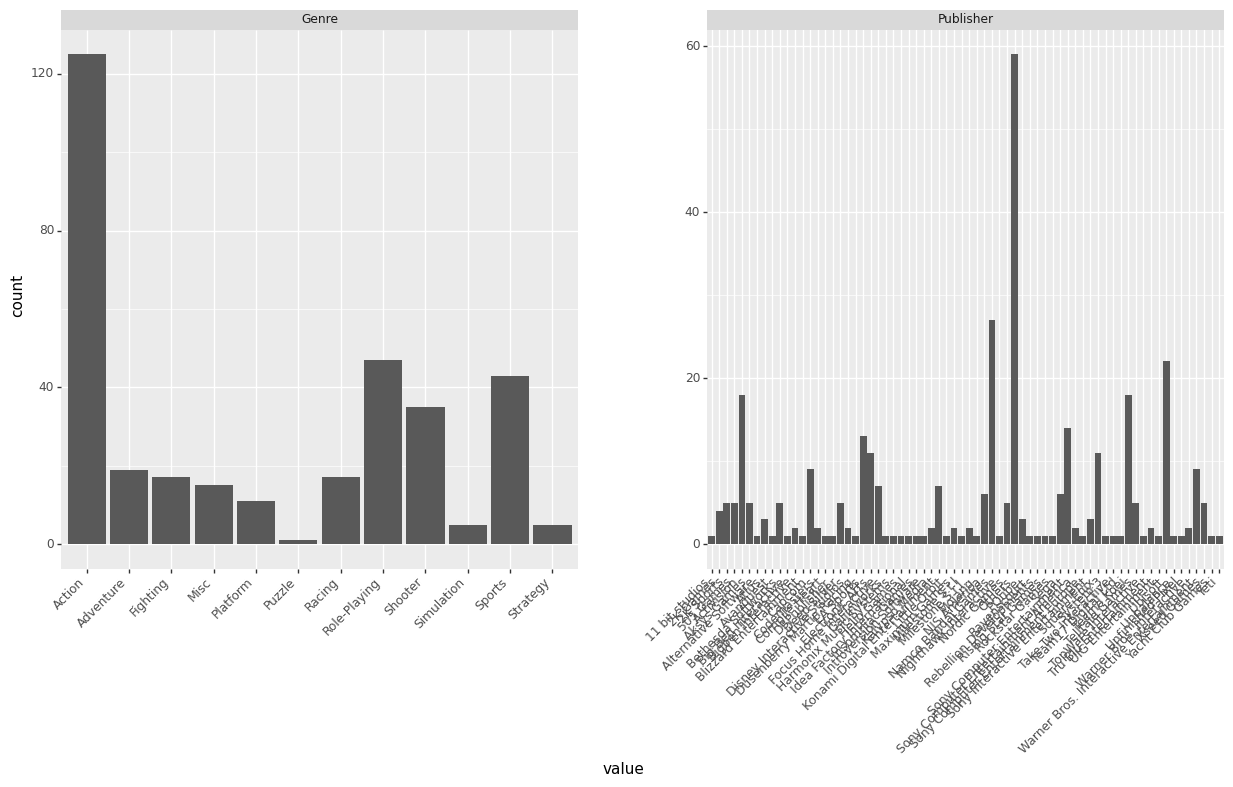

<ggplot: (310253538)>

In [126]:
d = final.select_dtypes(include="category").melt()
(
    ggplot(d,aes(x="value")) +
    geom_bar() +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(15,7),
          subplots_adjust={'wspace':0.25,
                           'hspace':0.75},
         axis_text_x=element_text(rotation=45, hjust=1))
)

## Pre-proocess Data

In [153]:

#From the previous data analysis, we need to 
# log transform assets, debt, income, Seniority and expenses.
final['Global_Sales'] = np.log(final['Global_Sales'] + 1)
final['JP_Sales'] = np.log(final['JP_Sales'] + 1)
final['NA_Sales'] = np.log(final['NA_Sales'] + 1)
final['EU_Sales'] = np.log(final['EU_Sales'] + 1)
final['Other_Sales'] = np.log(final['Other_Sales'] + 1)

In [154]:
#for the convenience of calculation, only consider the top 10 Publisher and group other publisher as "Others"
publish = (final.groupby(by=["Publisher"]).count()).sort_values(by=['Name'],ascending= False)[1:11]
Pub_list = publish.index.tolist()
#Pub_list
## Publisher
#(final.groupby(by=["Publisher"]).count()).sort_values(by=['Name'],ascending= False)[1:11]
final['Namco'] = 1*(final['Publisher'] == "Namco Bandai Games")
final['Ubisoft'] = 1*(final['Publisher'] == "Ubisoft")
final['Activision'] = 1*(final['Publisher'] == "Activision")
final['Sony'] = 1*(final['Publisher'] == "Sony Computer Entertainment")
final['EA'] = 1*(final['Publisher'] == "EA Sports")
final['Square_Enix'] = 1*(final['Publisher'] == "Square Enix")
final['Electronic_Arts'] = 1*(final['Publisher'] == "Electronic Arts")
final['Capcom'] = 1*(final['Publisher'] == "Capcom")
final['Tecmo_Koei'] = 1*(final['Publisher'] == "Tecmo Koei")
final['Warner_Bros'] = 1*(final['Publisher'] == "Warner Bros. Interactive Entertainment")

##Puzzle
final['Action'] = 1*(final['Genre'] == "Action")
final['Shooter'] = 1*(final['Genre'] == "Shooter")
final['Sports'] = 1*(final['Genre'] == "'Sports")
final['Role-Playing'] = 1*(final['Genre'] == "Role-Playing")
final['Adventure'] = 1*(final['Genre'] == "Adventure")
final['Misc'] = 1*(final['Genre'] == "Misc")
final['Platform'] = 1*(final['Genre'] == "Platform")
final['Strategy'] = 1*(final['Genre'] == "Strategy")
final['Simulation'] = 1*(final['Genre'] == "Simulation")
final['Racing'] = 1*(final['Genre'] == "Racing")
final['Puzzle'] = 1*(final['Genre'] == "Puzzle")
final['Fighting'] = 1*(final['Genre'] == "Fighting")

In [155]:
final.head()

,Name,Publisher,VGChartz Score,Critic Score,User Score,Total Shipped,Day_Since_Released,Rank,Platform,Year,...,Shooter,Sports,Role-Playing,Adventure,Misc,Strategy,Simulation,Racing,Puzzle,Fighting
1,Grand Theft Auto V,Rockstar Games,NaN,9.700000,NaN,NaN,2205.0,45.0,0,2014.0,...,0,0,0,0,0,0,0,0,0,0
2,Uncharted 4: A Thief's End,Sony Interactive Entertainment,NaN,9.200000,NaN,16.25m,1666.0,272.0,0,2016.0,...,1,0,0,0,0,0,0,0,0,0
3,Call of Duty: Black Ops 3,Activision,NaN,8.080556,NaN,NaN,1852.0,34.0,0,2015.0,...,1,0,0,0,0,0,0,0,0,0
9,FIFA 17,Electronic Arts,NaN,8.900000,NaN,NaN,1526.0,222.0,0,2016.0,...,0,0,0,0,0,0,0,0,0,0
10,The Witcher 3: Wild Hunt,Warner Bros. Interactive Entertainment,NaN,8.080556,NaN,10.80m,2023.0,332.0,0,2015.0,...,0,0,1,0,0,0,0,0,0,0


In [156]:
final.to_csv("final_table.csv", index=False)